In [14]:
# Initialize system

from credit_decision_system.credit_decision_system import CreditDecisionSystem

system = CreditDecisionSystem(use_llm=True, NLP_AVAILABLE=True)

✅ RAG system initialized successfully


In [15]:
# Load and prepare data
system.load_data()

In [16]:
# Train models
system.train_models()

Training standard models...
Training logistic_regression...
Training calibrated_logistic_regression...
Training xgboost...
Training random_forest...
✅ All models trained successfully


/Users/reetmitra/Desktop/credit-decision-system-cs3263/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/reetmitra/Desktop/credit-decision-system-cs3263/venv/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/reetmitra/Desktop/credit-decision-system-cs3263/venv/lib/python3.11/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/reetmitra/Desktop/credit-decision-system-cs3263/venv/li

In [17]:
# Evaluate models
system.evaluate_models()


Evaluating models...

Evaluating logistic_regression...
Accuracy: 0.7500
Precision (Class 1): 0.5676
Recall (Class 1): 0.7000
F1 Score (Class 1): 0.6269
ROC AUC: 0.7881

Evaluating calibrated_logistic_regression...
Accuracy: 0.8000
Precision (Class 1): 0.7500
Recall (Class 1): 0.5000
F1 Score (Class 1): 0.6000
ROC AUC: 0.7867

Evaluating xgboost...
Accuracy: 0.7600
Precision (Class 1): 0.6250
Recall (Class 1): 0.5000
F1 Score (Class 1): 0.5556
ROC AUC: 0.7614

Evaluating random_forest...
Accuracy: 0.8000
Precision (Class 1): 0.7083
Recall (Class 1): 0.5667
F1 Score (Class 1): 0.6296
ROC AUC: 0.7886


{'logistic_regression': {'confusion_matrix': array([[54, 16],
         [ 9, 21]]),
  'classification_report': {'0': {'precision': 0.8571428571428571,
    'recall': 0.7714285714285715,
    'f1-score': 0.8120300751879699,
    'support': 70.0},
   '1': {'precision': 0.5675675675675675,
    'recall': 0.7,
    'f1-score': 0.6268656716417911,
    'support': 30.0},
   'accuracy': 0.75,
   'macro avg': {'precision': 0.7123552123552124,
    'recall': 0.7357142857142858,
    'f1-score': 0.7194478734148805,
    'support': 100.0},
   'weighted avg': {'precision': 0.7702702702702703,
    'recall': 0.75,
    'f1-score': 0.7564807541241163,
    'support': 100.0}},
  'roc_auc': np.float64(0.7880952380952381),
  'fpr': array([0.        , 0.        , 0.        , 0.02857143, 0.02857143,
         0.04285714, 0.04285714, 0.07142857, 0.07142857, 0.08571429,
         0.08571429, 0.11428571, 0.11428571, 0.21428571, 0.21428571,
         0.22857143, 0.22857143, 0.24285714, 0.24285714, 0.42857143,
         0.428


🔎 Interpreting model behavior...

📊 Top Predictors in Logistic Regression:
                                        feature  coefficient
                             purpose_car (used)    -1.000758
    checking_account_status_no checking account    -0.989396
credit_history_critical account / other credits    -0.841149
                              purpose_education     0.766320
                 checking_account_status_< 0 DM     0.695752
                              foreign_worker_no    -0.653552
                                 purpose_others    -0.618868
            employment_since_4 <= ... < 7 years    -0.618749
                              purpose_car (new)     0.585277
                             foreign_worker_yes     0.575112
                        other_debtors_guarantor    -0.535085
      credit_history_all credits paid back duly     0.524628
                 property_unknown / no property     0.518252
                                purpose_repairs     0.500619
         

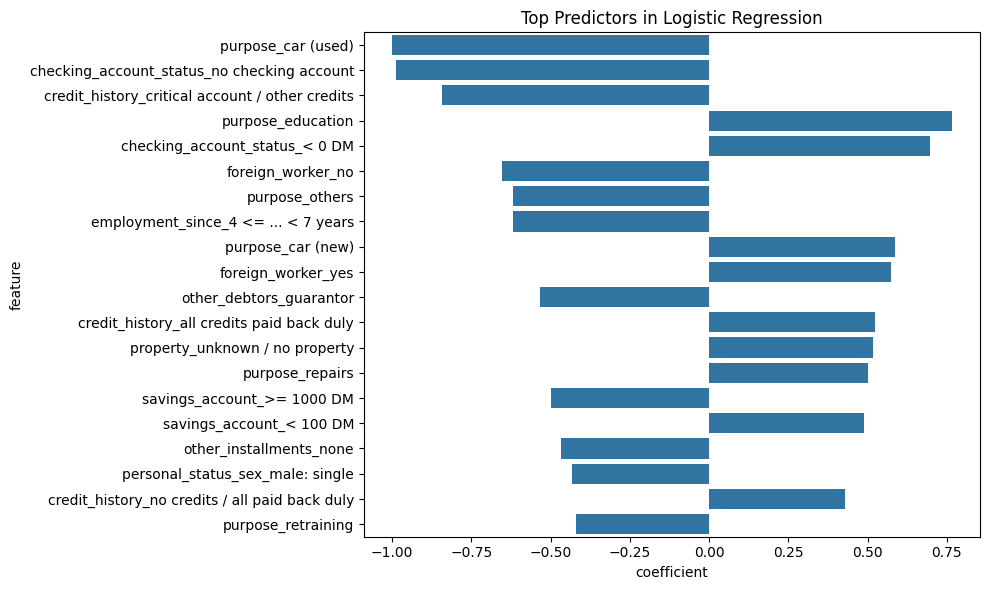

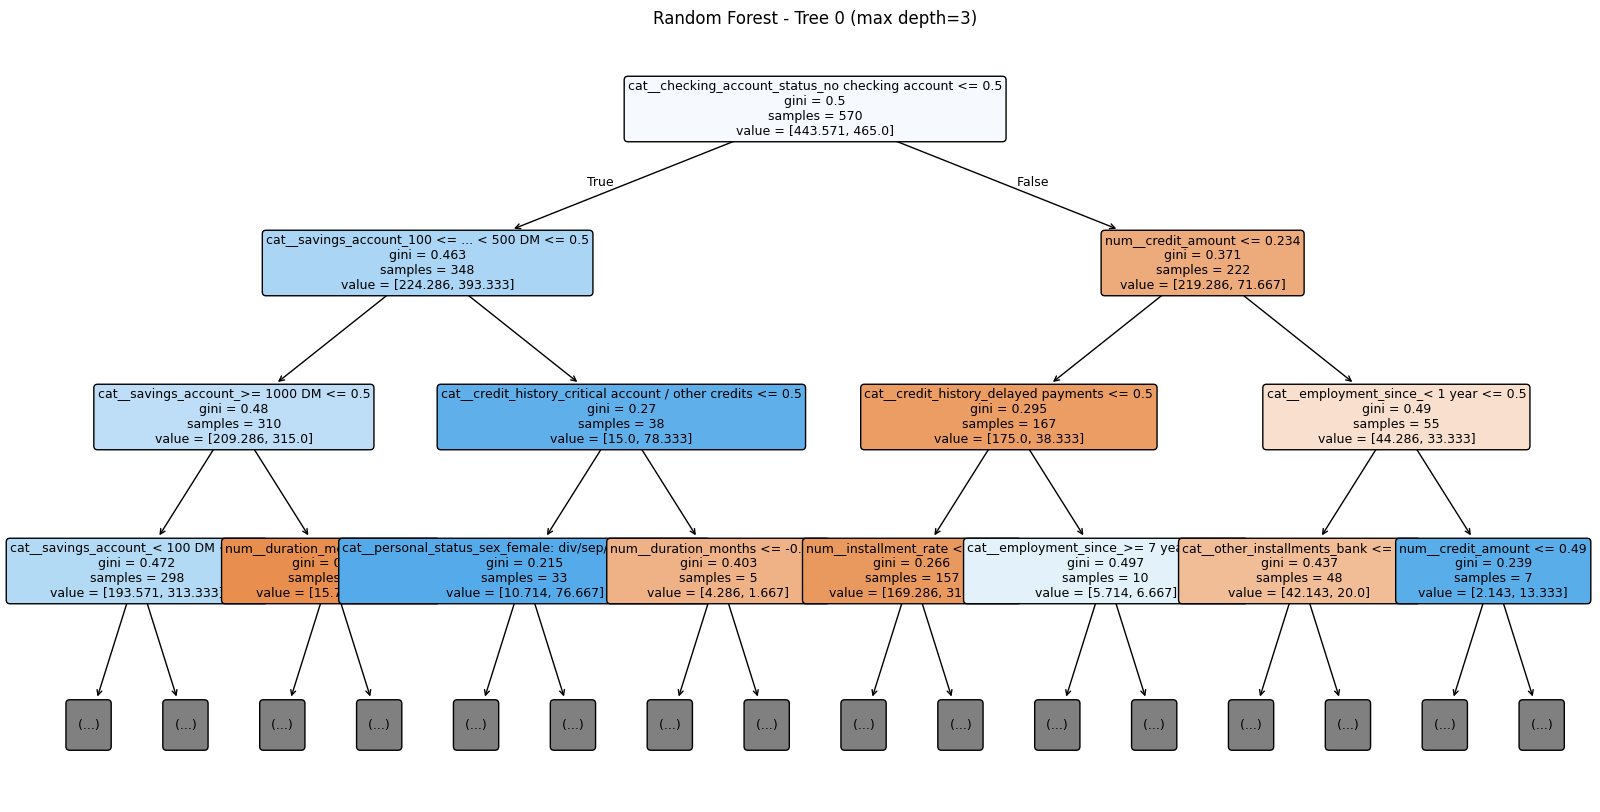

In [18]:
# Interpret models

system.explain_model_behaviors()


📊 Fairness Evaluation for Protected Attribute: personal_status_sex


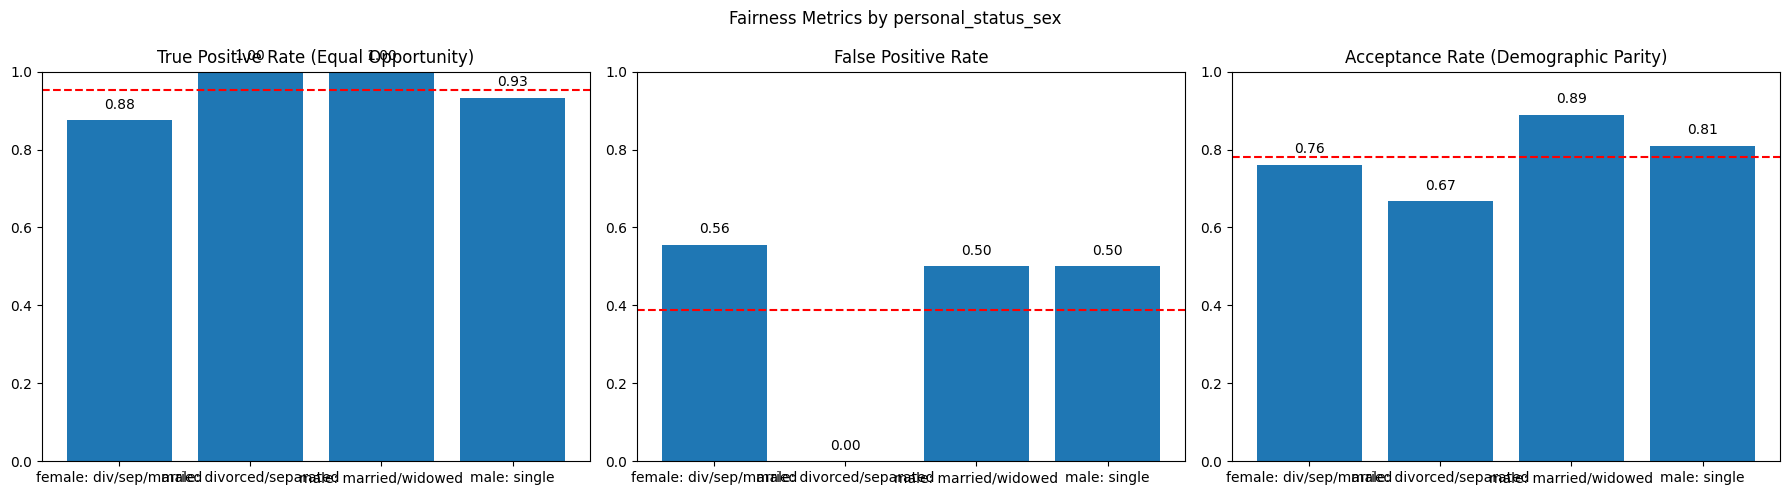


📌 True Positive Rate (Equal Opportunity)
 - female: div/sep/married: 0.875
 - male: single: 0.933
 - male: married/widowed: 1.000
 - male: divorced/separated: 1.000

📌 False Positive Rate
 - female: div/sep/married: 0.556
 - male: single: 0.500
 - male: married/widowed: 0.500
 - male: divorced/separated: 0.000

📌 Acceptance Rate (Demographic Parity)
 - female: div/sep/married: 0.760
 - male: single: 0.810
 - male: married/widowed: 0.889
 - male: divorced/separated: 0.667

📊 Fairness Evaluation for Protected Attribute: age_group


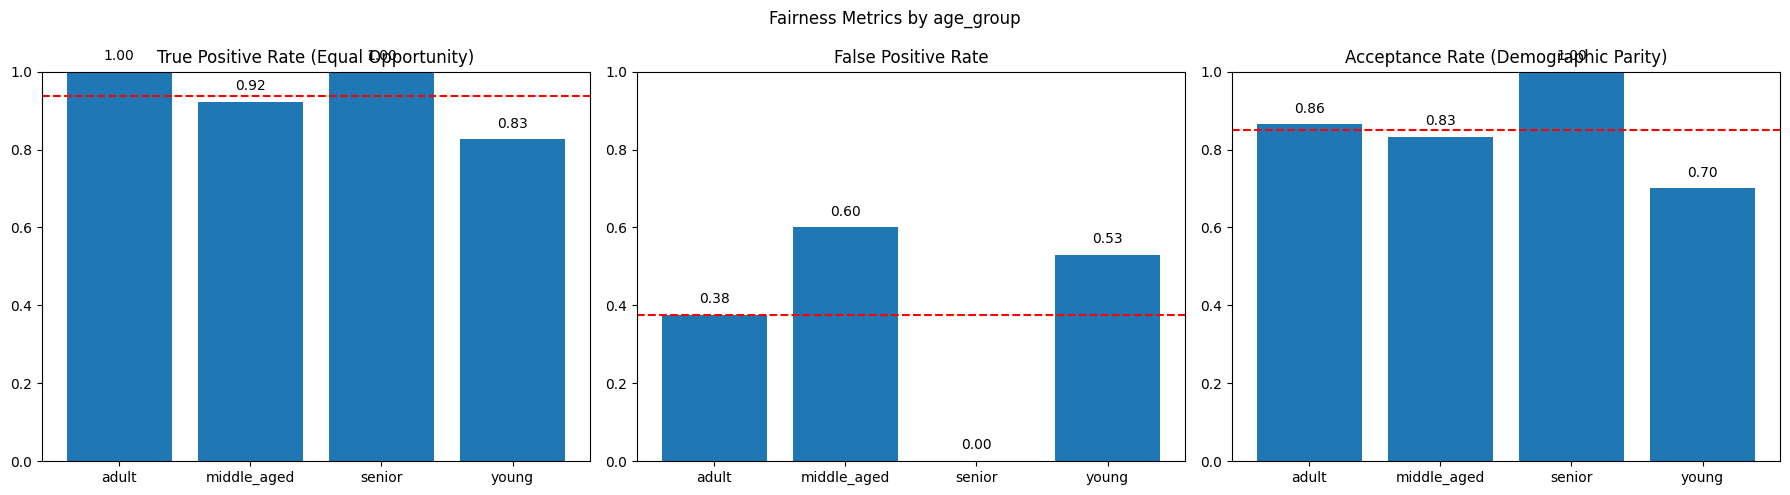


📌 True Positive Rate (Equal Opportunity)
 - middle_aged: 0.923
 - young: 0.826
 - adult: 1.000
 - senior: 1.000

📌 False Positive Rate
 - middle_aged: 0.600
 - young: 0.529
 - adult: 0.375
 - senior: 0.000

📌 Acceptance Rate (Demographic Parity)
 - middle_aged: 0.833
 - young: 0.700
 - adult: 0.865
 - senior: 1.000

📊 Fairness Evaluation for Protected Attribute: foreign_worker


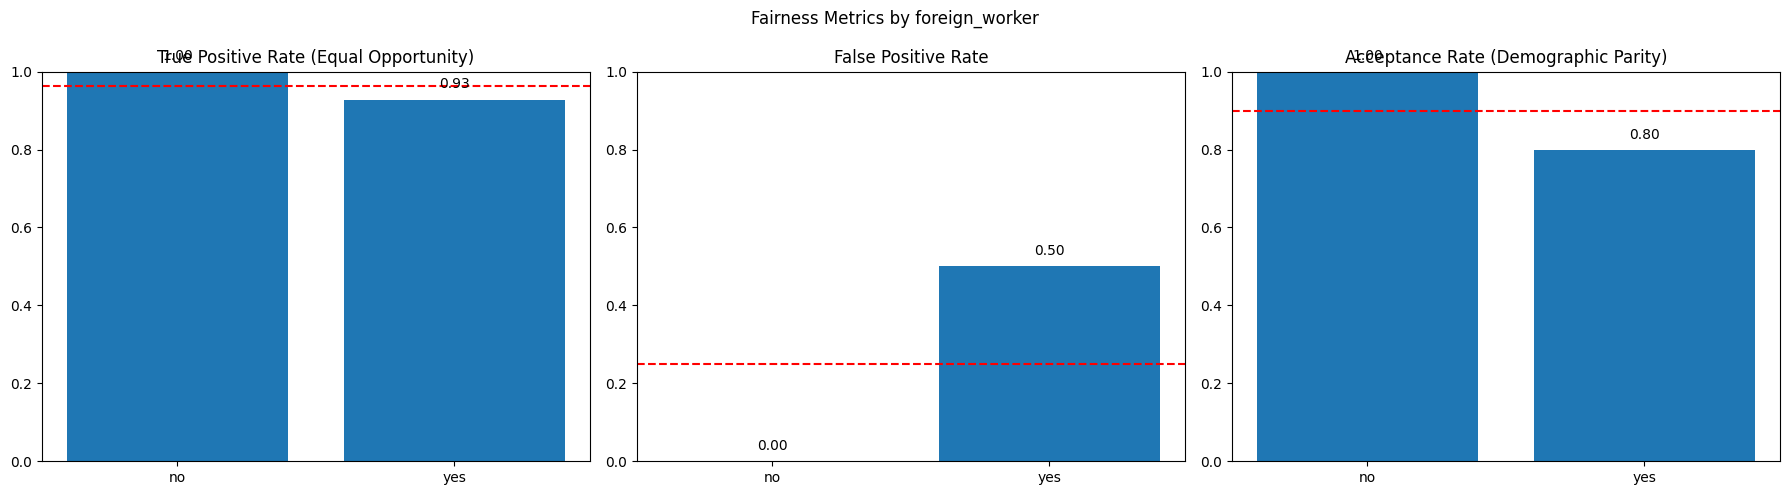


📌 True Positive Rate (Equal Opportunity)
 - yes: 0.928
 - no: 1.000

📌 False Positive Rate
 - yes: 0.500
 - no: 0.000

📌 Acceptance Rate (Demographic Parity)
 - yes: 0.798
 - no: 1.000


{'personal_status_sex': [([('female: div/sep/married', 0.875),
    ('male: single', 0.9333333333333333),
    ('male: married/widowed', 1.0),
    ('male: divorced/separated', 1.0)],
   'True Positive Rate (Equal Opportunity)',
   <Axes: title={'center': 'True Positive Rate (Equal Opportunity)'}>),
  ([('female: div/sep/married', 0.5555555555555556),
    ('male: single', 0.5),
    ('male: married/widowed', 0.5),
    ('male: divorced/separated', 0.0)],
   'False Positive Rate',
   <Axes: title={'center': 'False Positive Rate'}>),
  ([('female: div/sep/married', 0.76),
    ('male: single', 0.8095238095238095),
    ('male: married/widowed', 0.8888888888888888),
    ('male: divorced/separated', 0.6666666666666666)],
   'Acceptance Rate (Demographic Parity)',
   <Axes: title={'center': 'Acceptance Rate (Demographic Parity)'}>)],
 'age_group': [([('middle_aged', 0.9230769230769231),
    ('young', 0.8260869565217391),
    ('adult', 1.0),
    ('senior', 1.0)],
   'True Positive Rate (Equal Oppor

In [19]:
# Evaluate fairness

system.evaluate_fairness()


🔍 Starting joint tuning of Single Q and Double Q agents...

🎯 Testing α=0.05, γ=0.95, ε=0.3
 - Single Q Reward: -824748.38
 - Double Q Reward: -795876.54
🎯 Testing α=0.1, γ=0.9, ε=0.2
 - Single Q Reward: -877027.13
 - Double Q Reward: -1050752.87
🎯 Testing α=0.1, γ=0.8, ε=0.1
 - Single Q Reward: -864020.22
 - Double Q Reward: -907319.25
🎯 Testing α=0.2, γ=0.9, ε=0.1
 - Single Q Reward: -769080.82
 - Double Q Reward: -1085611.04
🎯 Testing α=0.05, γ=0.8, ε=0.1
 - Single Q Reward: -926956.15
 - Double Q Reward: -710308.19
🎯 Testing α=0.1, γ=0.8, ε=0.3
 - Single Q Reward: -867838.77
 - Double Q Reward: -713726.09
🎯 Testing α=0.1, γ=0.95, ε=0.2
 - Single Q Reward: -819718.66
 - Double Q Reward: -975133.51
🎯 Testing α=0.1, γ=0.95, ε=0.3
 - Single Q Reward: -1005115.81
 - Double Q Reward: -775759.43
🎯 Testing α=0.1, γ=0.9, ε=0.1
 - Single Q Reward: -800141.37
 - Double Q Reward: -861016.39
🎯 Testing α=0.2, γ=0.95, ε=0.1
 - Single Q Reward: -772922.45
 - Double Q Reward: -829702.64

🏁 Best Hy

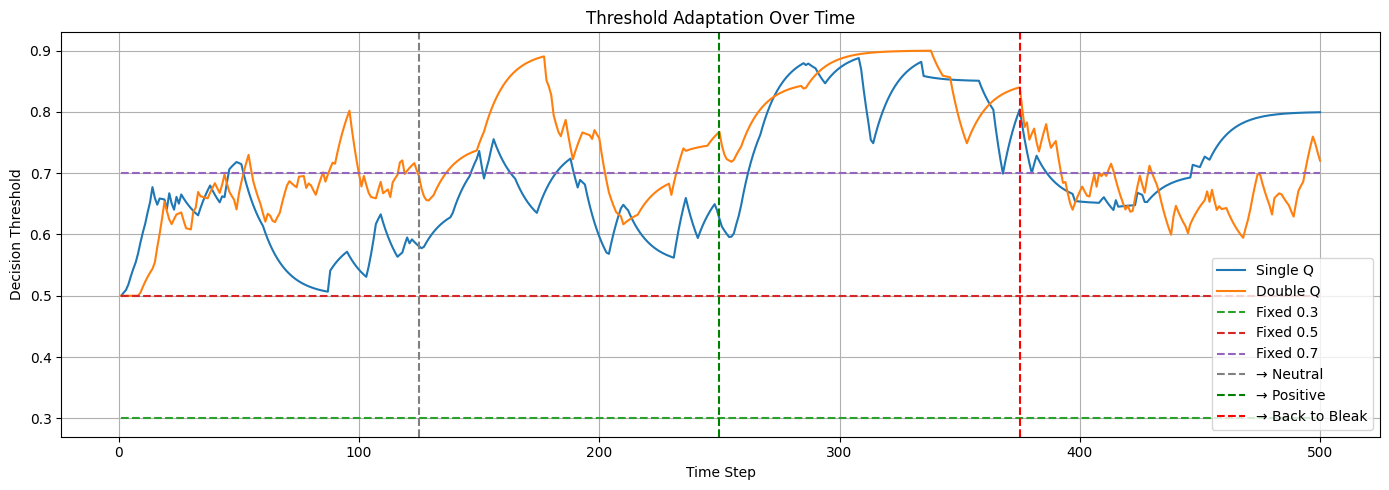

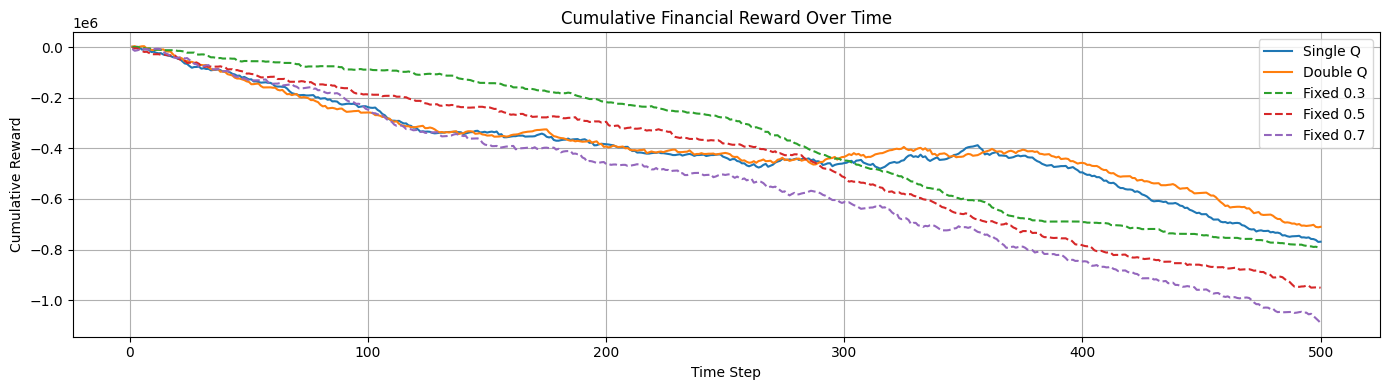

{'best_single_q': {'reward': np.float64(-769080.8200000002),
  'alpha': 0.2,
  'gamma': 0.9,
  'epsilon': 0.1,
  'result': {'label': 'Single Q',
   'thresholds': [0.5,
    0.505,
    0.5095000000000001,
    0.5185500000000001,
    0.531695,
    0.5435255000000001,
    0.5541729500000001,
    0.5687556550000001,
    0.5868800895000001,
    0.6031920805500002,
    0.6178728724950002,
    0.6360855852455003,
    0.6524770267209503,
    0.6772293240488553,
    0.6595063916439698,
    0.648555752479573,
    0.6587001772316157,
    0.6578301595084541,
    0.6570471435576088,
    0.641342429201848,
    0.6672081862816632,
    0.650487367653497,
    0.6404386308881473,
    0.6613947677993326,
    0.6502552910193994,
    0.6652297619174594,
    0.6587067857257134,
    0.6528361071531421,
    0.6475524964378279,
    0.642797246794045,
    0.6385175221146406,
    0.6346657699031766,
    0.6311991929128589,
    0.6430792736215729,
    0.6537713462594157,
    0.6633942116334741,
    0.6720547904701

In [20]:
# Tune threshold using RL agent

system.tune_and_compare_agents_via_simulation(n_trials=10, total_steps=500)


Preparing RL agent with synthetic data...

Training RL agent for bleak context...
Training RL threshold optimizer for 'bleak' context...


100%|██████████| 500/500 [00:15<00:00, 31.97it/s]


✅ Training complete. Best threshold for 'bleak': 0.50
✅ Optimal threshold for bleak context: 0.50

Training RL agent for neutral context...
Training RL threshold optimizer for 'neutral' context...


100%|██████████| 500/500 [00:15<00:00, 32.36it/s]


✅ Training complete. Best threshold for 'neutral': 0.90
✅ Optimal threshold for neutral context: 0.90

Training RL agent for positive context...
Training RL threshold optimizer for 'positive' context...


100%|██████████| 500/500 [00:15<00:00, 32.40it/s]


✅ Training complete. Best threshold for 'positive': 0.90
✅ Optimal threshold for positive context: 0.90


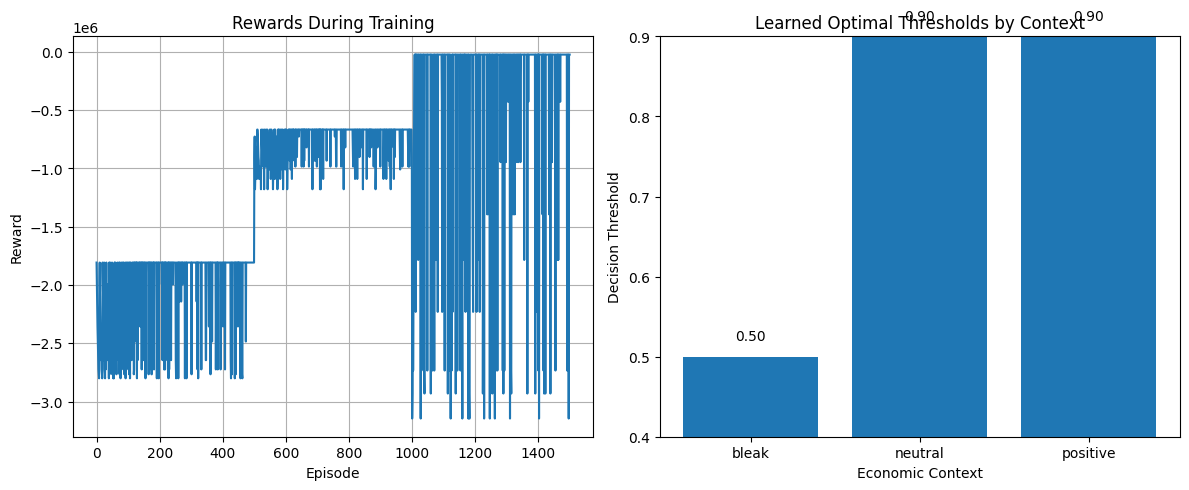

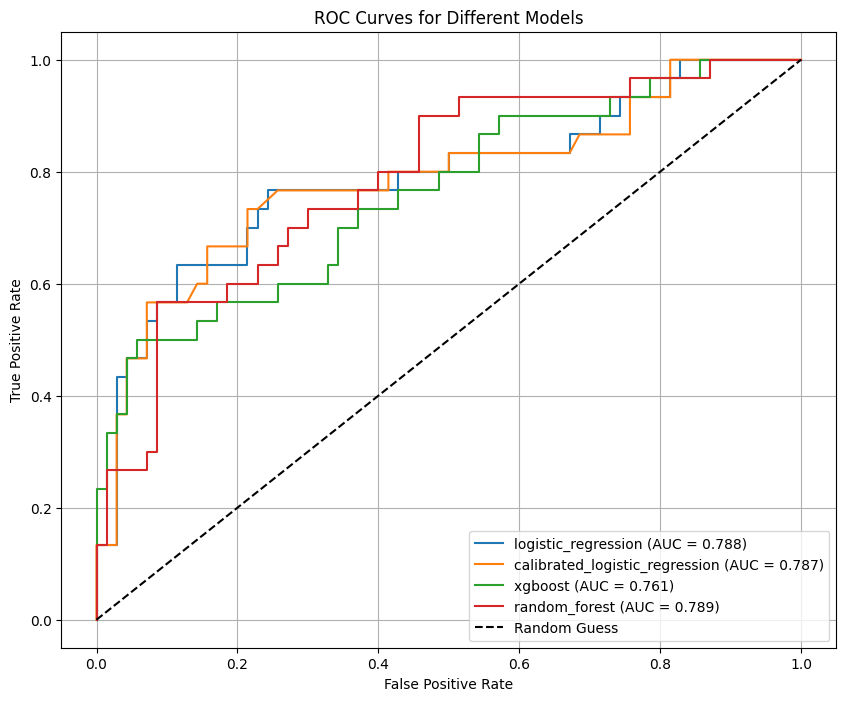

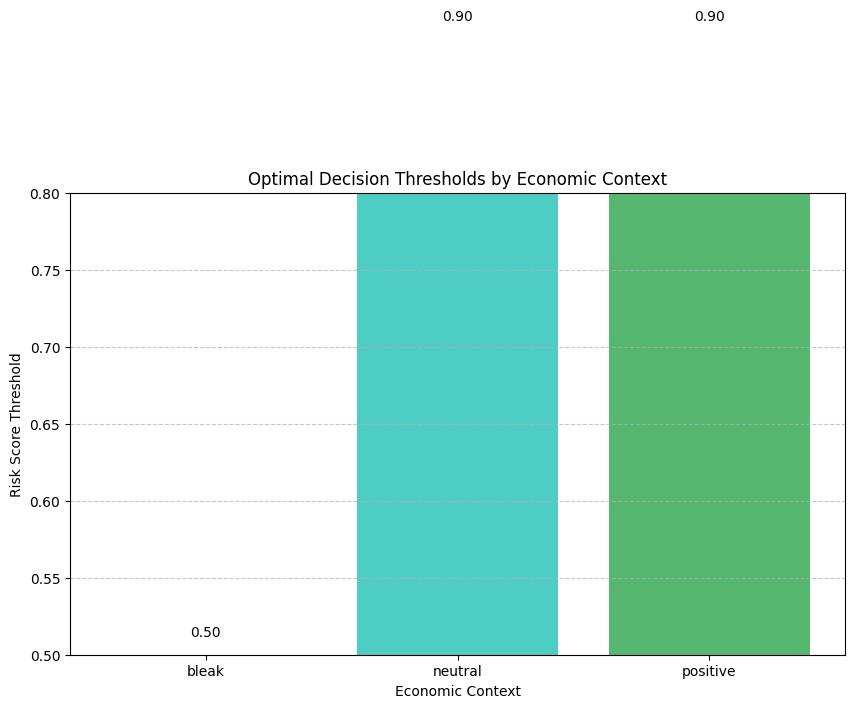

In [21]:
# Prepare RL agent

system.prepare_rl_agent()
system.visualize_model_performance()
system.visualize_context_thresholds()

In [22]:
# Demo with synthetic applicants

contexts = ["bleak", "neutral", "positive"]
for context in contexts:
    print(f"\n--- Test applicant in {context.upper()} economic context ---")
    
    # Generate synthetic applicant
    applicant_df = system.generator.generate_applicants(1, context)
    applicant = applicant_df.iloc[0]
    
    # Economic context query
    if context == "bleak":
        query = "Singapore's tech industry layoffs have increased by 30%, and venture capital funding is down 40% year-over-year."
    elif context == "neutral":
        query = "Singapore's tech industry shows mixed signals with hiring steady in established companies while startups report tighter funding."
    else:  # positive
        query = "Singapore's tech industry is booming with record investments and aggressive hiring across all sectors."
    
    # Make decision
    decision = system.make_decision(applicant, query)
    
    # Print key information
    print(f"Economic Context: {decision['economic_context']} (Reasoning: {decision['context_reasoning']})")
    print(f"Risk Score: {decision['risk_score']:.3f}, Threshold: {decision['threshold']:.3f}")
    print(f"Decision: {decision['decision']}")
    print(f"Explanation: {decision['explanation']}")


--- Test applicant in BLEAK economic context ---
Economic Context: bleak (Reasoning: Based on negative economic indicators in query)
Risk Score: 0.449, Threshold: 0.500
Decision: APPROVED
Explanation: Your application has been approved. During the current economic downturn, we've adjusted our lending criteria to be more conservative. Your risk score of 0.45 was just below our current threshold of 0.50.

--- Test applicant in NEUTRAL economic context ---
Economic Context: neutral (Reasoning: No strong indicators in either direction)
Risk Score: 0.547, Threshold: 0.900
Decision: APPROVED
Explanation: Your application has been approved! Based on current economic conditions, we're using standard lending criteria. Your risk score of 0.55 was well below our current threshold of 0.90, indicating a strong credit profile.

--- Test applicant in POSITIVE economic context ---
Economic Context: positive (Reasoning: Based on positive economic indicators in query)
Risk Score: 0.464, Threshold: 0.90